In [83]:
import pandas as pd
import numpy as np
from datetime import datetime

In [84]:
# Load the alert data of snort 2

snort2_alert_df = pd.read_csv('/Users/marshal/Desktop/cooperative_snort /snort2/snort2.csv')



# Load the labeled dataset 
label_df = pd.read_csv('/Users/marshal/Desktop/cooperative_snort /snort2/Mergeddata.csv', encoding='ISO-8859-1')



In [116]:
# Exclude the 'Positives' column from the DataFrame
columns_to_fill = [col for col in snort2_alert_df.columns if col != 'Positives']

# Replace NaN values with 0 
snort2_alert_df[columns_to_fill] = snort2_alert_df[columns_to_fill].fillna(0)

print(snort2_alert_df)

         Timestamp  gid                                  event.message  \
0     07/07-08:00     1  ICMP Destination Unreachable Port Unreachable   
1     07/07-08:00     1  ICMP Destination Unreachable Port Unreachable   
2     07/07-08:00     1  ICMP Destination Unreachable Port Unreachable   
3     07/07-08:00     1  ICMP Destination Unreachable Port Unreachable   
4     07/07-08:01     1  ICMP Destination Unreachable Port Unreachable   
...            ...  ...                                            ...   
7648  07/07-16:01     1          NETBIOS SMB IPC$ unicode share access   
7649  07/07-16:00     1                   INFO web bug 0x0 gif attempt   
7650  07/07-16:01     1  ICMP Destination Unreachable Host Unreachable   
7651  07/07-16:01     1  ICMP Destination Unreachable Host Unreachable   
7652  07/07-16:01     1                   INFO web bug 0x0 gif attempt   

     Protocol      Source_IP  Source_Port Destination_IP  Destination_Port  \
0        ICMP  192.168.10.14     

In [86]:
# timestamp format has changed 
snort2_alert_df[' Timestamp'] = snort2_alert_df[' Timestamp'].str.replace(r':\d{2}\.\d{6}', '', regex=True)


In [87]:
snort2_alert_df

,Timestamp,gid,event.message,Protocol,Source_IP,Source_Port,Destination_IP,Destination_Port,Source_MAC_Address,Destination_MAC_Address,Positives
0,07/07-08:00,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
1,07/07-08:00,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
2,07/07-08:00,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
3,07/07-08:00,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
4,07/07-08:01,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7648,07/07-16:01,1,NETBIOS SMB IPC$ unicode share access,TCP,192.168.10.25,54244.0,192.168.10.50,139.0,00:25:00:A8:C4:60,00:19:B9:0A:69:F1,NaN
7649,07/07-16:00,1,INFO web bug 0x0 gif attempt,TCP,14.0.67.56,80.0,192.168.10.25,54187.0,00:C1:B1:14:EB:31,00:25:00:A8:C4:60,NaN
7650,07/07-16:01,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.8,0.0,00:C1:B1:14:EB:31,B8:AC:6F:36:08:F5,NaN
7651,07/07-16:01,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.15,0.0,00:C1:B1:14:EB:31,00:1E:4F:D4:CA:28,NaN


In [88]:
print(snort2_alert_df.columns)
print(label_df.columns)

Index([' Timestamp', 'gid', 'event.message', ' Protocol', ' Source_IP',
       ' Source_Port', ' Destination_IP', ' Destination_Port',
       'Source_MAC_Address', 'Destination_MAC_Address', 'Positives'],
      dtype='object')
Index(['ï»¿Flow_ID', ' Source_IP', ' Source_Port', ' Destination_IP',
       ' Destination_Port', ' Protocol', ' Timestamp', ' Label'],
      dtype='object')


In [89]:
snort2_alert_df.columns = snort2_alert_df.columns.str.strip()
label_df.columns = label_df.columns.str.strip()


In [90]:
print(snort2_alert_df.columns)
print(label_df.columns)

Index(['Timestamp', 'gid', 'event.message', 'Protocol', 'Source_IP',
       'Source_Port', 'Destination_IP', 'Destination_Port',
       'Source_MAC_Address', 'Destination_MAC_Address', 'Positives'],
      dtype='object')
Index(['ï»¿Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP',
       'Destination_Port', 'Protocol', 'Timestamp', 'Label'],
      dtype='object')


In [91]:
label_df

,ï»¿Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,07/07/2017 03:30,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,07/07/2017 03:30,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,07/07/2017 03:30,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,07/07/2017 03:30,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,07/07/2017 03:30,BENIGN
...,...,...,...,...,...,...,...,...
703240,192.168.10.3-192.168.10.14-53-51018-17,192.168.10.14,51018,192.168.10.3,53,17,07/07/2017 12:59,BENIGN
703241,192.168.10.3-192.168.10.14-53-49984-17,192.168.10.14,49984,192.168.10.3,53,17,07/07/2017 12:59,BENIGN
703242,192.168.10.3-192.168.10.14-53-64015-17,192.168.10.14,64015,192.168.10.3,53,17,07/07/2017 12:59,BENIGN
703243,192.168.10.17-198.100.147.178-123-123-17,192.168.10.17,123,198.100.147.178,123,17,07/07/2017 12:59,BENIGN


In [117]:

label_df['Timestamp'] = label_df['Timestamp'].str.replace('/2017', '-')

label_df['Timestamp'] = label_df['Timestamp'].str.replace(' ', '')


In [118]:
label_df

,ï»¿Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,07/07-03:30,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,07/07-03:30,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,07/07-03:30,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,07/07-03:30,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,07/07-03:30,BENIGN
...,...,...,...,...,...,...,...,...
703240,192.168.10.3-192.168.10.14-53-51018-17,192.168.10.14,51018,192.168.10.3,53,17,07/07-12:59,BENIGN
703241,192.168.10.3-192.168.10.14-53-49984-17,192.168.10.14,49984,192.168.10.3,53,17,07/07-12:59,BENIGN
703242,192.168.10.3-192.168.10.14-53-64015-17,192.168.10.14,64015,192.168.10.3,53,17,07/07-12:59,BENIGN
703243,192.168.10.17-198.100.147.178-123-123-17,192.168.10.17,123,198.100.147.178,123,17,07/07-12:59,BENIGN


In [94]:
# Merge 'alert_df' and 'label_df' 
merged_df = snort2_alert_df.merge(label_df, on=['Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port'], how='inner')

# Create the boolean mask for matching rows
mask = merged_df.shape[0] > 0  

# Add a new 'Positives' column to 'alert_df' 
snort2_alert_df['Positives'] = mask


In [95]:


# Create a boolean mask for matching rows based on the specified columns
mask = (
    snort2_alert_df['Source_IP'].isin(label_df['Source_IP']) &
    snort2_alert_df['Source_Port'].isin(label_df['Source_Port']) &
    snort2_alert_df['Destination_IP'].isin(label_df['Destination_IP']) &
    snort2_alert_df['Destination_Port'].isin(label_df['Destination_Port'])
     
)

# Add a new 'Positives' column to 'alert_df' and set it to 'True' for matching rows
snort2_alert_df['Positives'] = mask


In [96]:
snort2_alert_df


,Timestamp,gid,event.message,Protocol,Source_IP,Source_Port,Destination_IP,Destination_Port,Source_MAC_Address,Destination_MAC_Address,Positives
0,07/07-08:00,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
1,07/07-08:00,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
2,07/07-08:00,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
3,07/07-08:00,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
4,07/07-08:01,1,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.10.14,0.0,192.168.10.3,0.0,B8:AC:6F:36:07:EE,18:66:DA:9B:E3:7D,True
...,...,...,...,...,...,...,...,...,...,...,...
7648,07/07-16:01,1,NETBIOS SMB IPC$ unicode share access,TCP,192.168.10.25,54244.0,192.168.10.50,139.0,00:25:00:A8:C4:60,00:19:B9:0A:69:F1,True
7649,07/07-16:00,1,INFO web bug 0x0 gif attempt,TCP,14.0.67.56,80.0,192.168.10.25,54187.0,00:C1:B1:14:EB:31,00:25:00:A8:C4:60,True
7650,07/07-16:01,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.8,0.0,00:C1:B1:14:EB:31,B8:AC:6F:36:08:F5,True
7651,07/07-16:01,1,ICMP Destination Unreachable Host Unreachable,ICMP,172.16.0.1,0.0,192.168.10.15,0.0,00:C1:B1:14:EB:31,00:1E:4F:D4:CA:28,True


In [97]:
#  To Count number of true and false values in the 'Positives' column
positives_counts = snort2_alert_df['Positives'].value_counts()

# Print the counts
print("Number of True Positives:", positives_counts[True])
print("Number of False Positives:", positives_counts[False])


Number of True Positives: 6623
Number of False Positives: 1030


In [98]:
snort2_alert_df['Positives'].value_counts()

Positives
True     6623
False    1030
Name: count, dtype: int64

In [99]:
label_df['Label'].value_counts()

Label
BENIGN      414322
PortScan    158930
DDoS        128027
Bot           1966
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


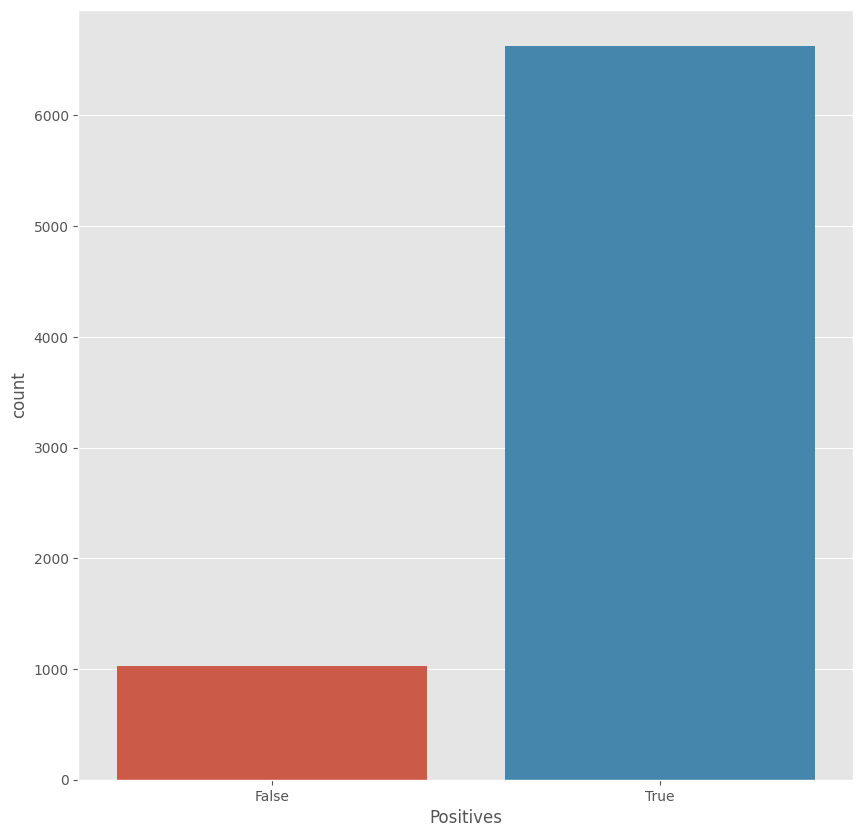

In [100]:
# true positives and false positives 
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
plt.style.use('ggplot')
sns.countplot(data=snort2_alert_df, x="Positives")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


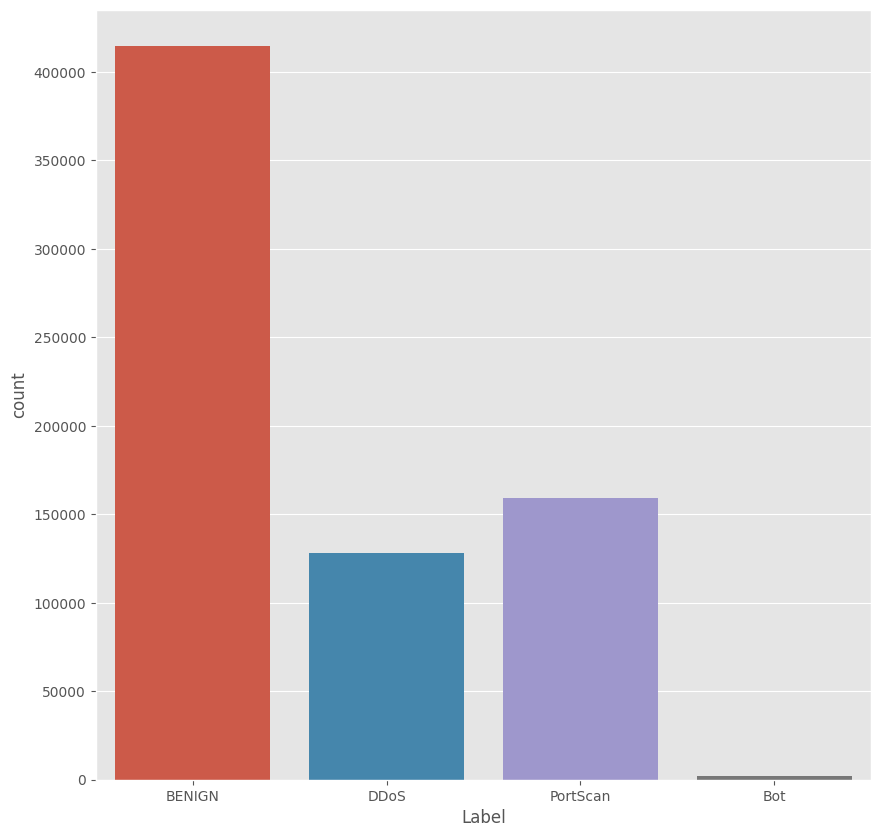

In [101]:

#label dataset 

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
plt.style.use('ggplot')
sns.countplot(data=label_df, x="Label")
plt.show()

In [102]:
# Given data for Snort's performance
total_packets = 703245
benign_packets = 414322
malicious_packets = 288923
snort_alerts = 7653
true_positives = 6623
false_positives = 1030


In [103]:
#to find true negatives
true_negatives = benign_packets - false_positives
print(f"True Negatives (TN): {true_negatives}")

True Negatives (TN): 413292


In [104]:
#to find false negatives

false_negatives = malicious_packets - true_positives
print(f"False Negatives (FN): {false_negatives}")

False Negatives (FN): 282300


In [105]:
#precision

precision = true_positives / (true_positives + false_positives)
print(f"Precision: {precision:.3f}")

Precision: 0.865


In [106]:
#recall

recall = true_positives / (true_positives + false_negatives)
print(f"Recall: {recall:.3f}")


Recall: 0.023


In [107]:
#F1-score for imbalanced datasets

f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score:.3f}")

F1 Score: 0.045


In [108]:

# Data plotting

labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values = [true_positives, true_negatives, false_positives, false_negatives]


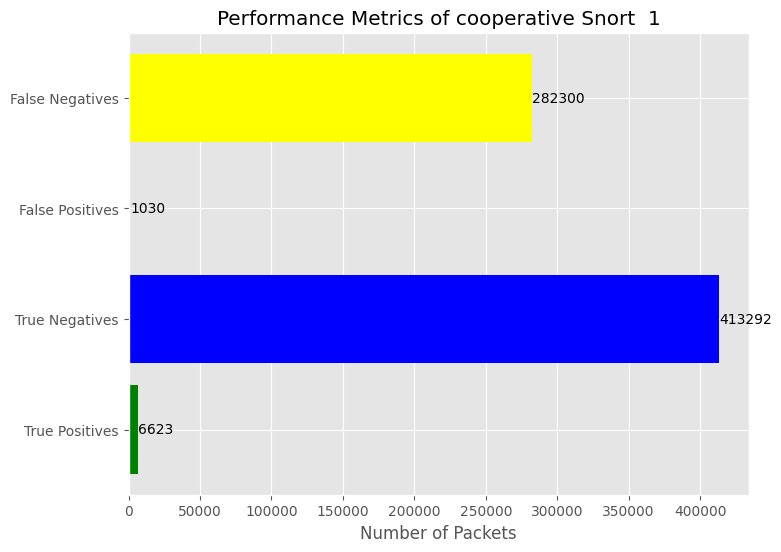

In [109]:

#  To Create bar chart
plt.figure(figsize=(8,6))
plt.barh(labels, values, color=['green', 'blue', 'red', 'yellow'])
plt.xlabel('Number of Packets')
plt.title('Performance Metrics of cooperative Snort  2')
plt.grid(True)


for i, v in enumerate(values):
    plt.text(v, i, f"{v}", va='center')

plt.show()


In [110]:

#  precision, recall, and F1 score values

precision = 0.865
recall = 0.23
f1_score = 0.45


In [111]:
# Labels for a bars
labels = ['Precision', 'Recall', 'F1 Score']

#  load the Values to the bars
values = [precision, recall, f1_score]

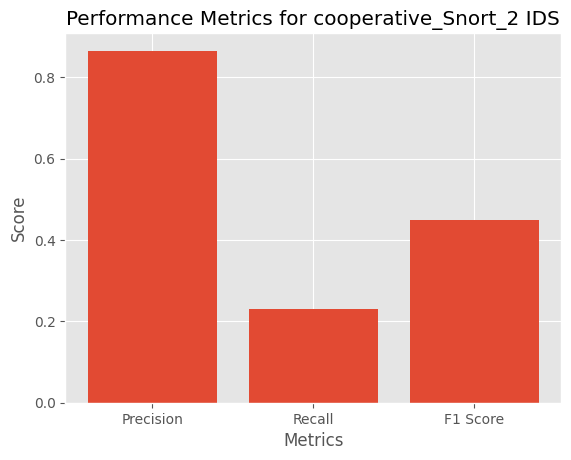

In [113]:
# to Create bar chart
plt.bar(labels, values)

plt.title('Performance Metrics for cooperative_Snort_2 IDS')
plt.xlabel('Metrics')
plt.ylabel('Score')

#  To Show the chart
plt.show()

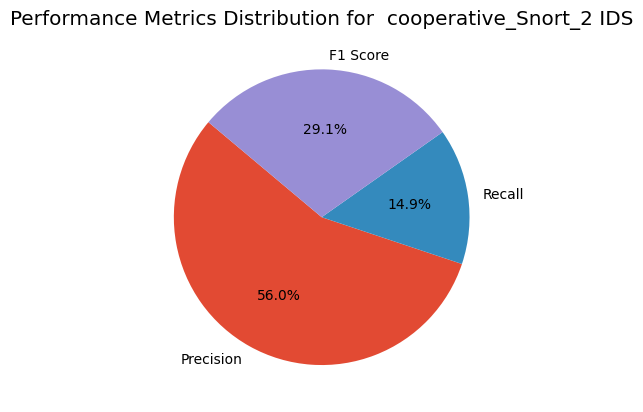

In [115]:


# Create  pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# title
plt.title('Performance Metrics Distribution for  cooperative_Snort_2 IDS')

#  to Show the chart
plt.show()
